We start by equipping the project with essential tools. Pandas and NumPy handle data efficiently, while Matplotlib, Seaborn, and Plotly Express create insightful visualizations. WordCloud dives into textual data nuances. Scikit-learn's train_test_split readies data for analysis, and PassiveAggressiveRegressor steps in for regression tasks. It's the foundation for data exploration and machine learning insights.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score


# Rading in to the data

In [41]:
data = pd.read_csv(r"C:\Users\user\Desktop\python portofolio projects\instagram reach forcating\Instagram data.csv", encoding='latin1')

In [42]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


# Data Exploration

Making sure the data doesn't contain any null values

In [43]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

## Data Information

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [45]:
data.nunique()

Impressions       101
From Home          97
From Hashtags     100
From Explore       95
From Other         84
Saves              84
Comments           15
Shares             28
Likes              85
Profile Visits     59
Follows            29
Caption            90
Hashtags           54
dtype: int64

## Descriptive Statistics
 We compute descriptive statistics of numerical features, including mean, standard deviation, minimum, and maximum values.

In [46]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


Identifying the top 5 highest correlated attribute pairs heps us focus on key realtionships.

In [47]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
top_5_correlations =upper_triangle.abs().stack().sort_values(ascending=False)[:5]
print('Top 5 highest corrleated attribute pairs are: ')
print(top_5_correlations)

Top 5 highest corrleated attribute pairs are: 
Impressions     From Explore    0.893607
                Follows         0.889363
Saves           Shares          0.860324
Profile Visits  Follows         0.853152
Impressions     Likes           0.849835
dtype: float64


# Analysis

We will start by measuring the engagement rates by weighting three different attributes i.e. shares, likes and comments. Comments being with the most weight and shares and likes next in order.

## Engagement Metrics Calculation
Understanding engagement metrics is crucial for influencers and businesses on Instagram. We calculate Weighted Engagement Rate and Engagement per Follower to gauge user interaction.

### Weighted Engagement Rate Calculation

In [48]:
data['Weighted Engagement Rate'] = (2 * data['Comments'] + data['Likes'] + 1.5 * data['Shares']) / data['Impressions']


In [49]:
print(data[['Comments', 'Likes', 'Shares', 'Impressions', 'Weighted Engagement Rate']])

     Comments  Likes  Shares  Impressions  Weighted Engagement Rate
0           9    162       5         3920                  0.047832
1           7    224      14         5394                  0.048016
2          11    131       1         4021                  0.038423
3          10    213       7         4528                  0.053777
4           5    123       4         2518                  0.055203
..        ...    ...     ...          ...                       ...
114         2    373      38        13700                  0.031679
115         4    148       1         5731                  0.027482
116         0     92       1         4139                  0.022590
117         2    549      75        32695                  0.020355
118         5    443      26        36919                  0.013326

[119 rows x 5 columns]


### Engagement Per Follower 

To normalize engagement based on the size of audience we'll calculate the engagement per follower

In [50]:
data['Engagement Per Follower']= (data['Likes']+ data['Comments']+ data['Shares'])/data['Follows']
print(data[['Comments', 'Likes', 'Shares', 'Follows', 'Engagement Per Follower']])

     Comments  Likes  Shares  Follows  Engagement Per Follower
0           9    162       5        2                88.000000
1           7    224      14       10                24.500000
2          11    131       1       12                11.916667
3          10    213       7        8                28.750000
4           5    123       4        0                      inf
..        ...    ...     ...      ...                      ...
114         2    373      38       80                 5.162500
115         4    148       1       18                 8.500000
116         0     92       1       10                 9.300000
117         2    549      75      214                 2.925234
118         5    443      26      228                 2.078947

[119 rows x 5 columns]


## Impressions from different sources
Analyzing impressions from various sources can help in understanding content reach and user interaction. We explore and visualize Impressions from the Home Page, Hashtags, Explore, and Other sources.

Since most impressions come from either the home feed, explore page, or hashtags, let's explore which of these sources contributes the most impressions

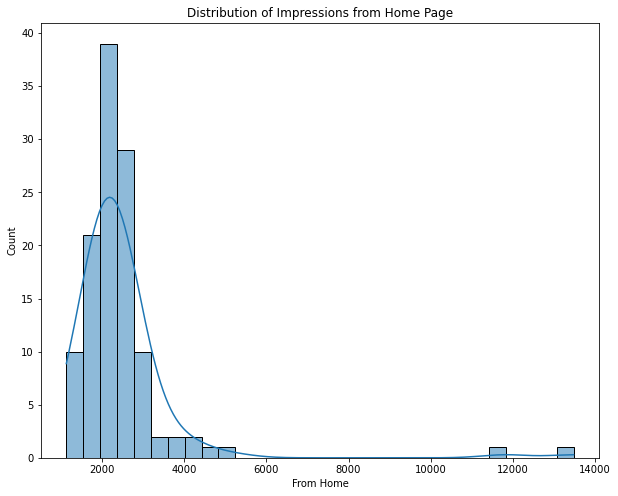

In [51]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Home Page")
sns.histplot(data['From Home'], bins=30, kde=True)
plt.show()

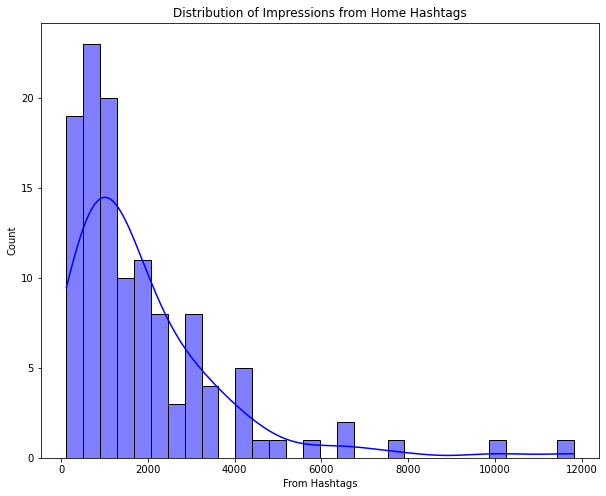

In [52]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Home Hashtags")

sns.histplot(data['From Hashtags'], bins=30, kde=True, color='blue')


plt.show()

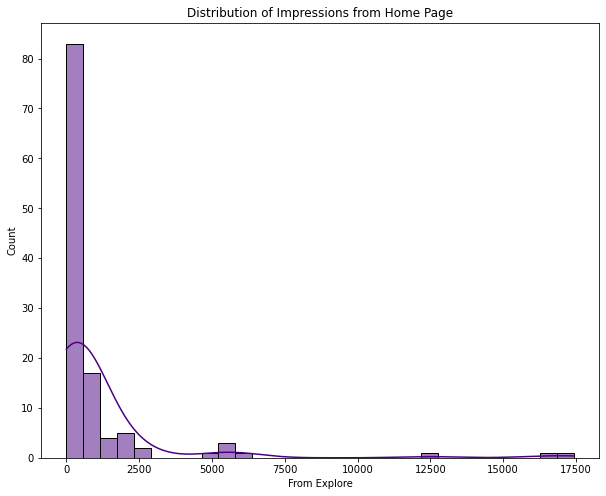

In [53]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Home Page")

sns.histplot(data['From Explore'],  bins=30, kde=True,color='indigo')


plt.show()

Now lets compare the the frequency of the impressions from the home page VS other sources

In [54]:
total_home_impressions = data['From Home'].sum()
total_home_impressions

294619

In [55]:
total_other_impressions = data['From Other'].sum()
total_other_impressions 

20360

In [56]:
total_explore_impressions = data['From Explore'].sum()
total_explore_impressions 

128294

In [57]:
total_hashtags_impressions = data['From Hashtags'].sum()
total_hashtags_impressions

224614

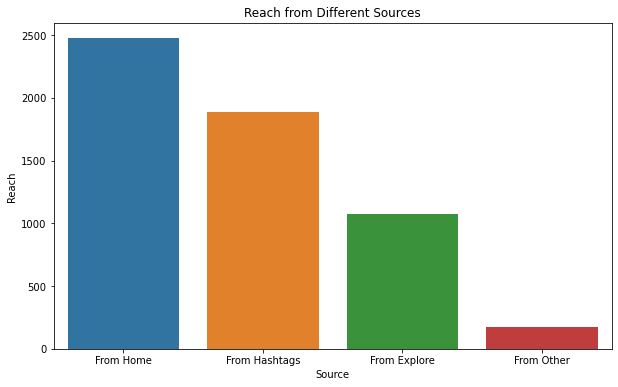

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
            y=[data['From Home'].mean(), data['From Hashtags'].mean(), data['From Explore'].mean(), data['From Other'].mean()])
plt.xlabel('Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.show()

## WordClouds for Hashtags and Captions
 Analyzing the most used hashtags and captions provides a glimpse into content themes and trends. We create WordClouds to visually represent the frequency of hashtags and captions.

### WordCloud For Hashtags

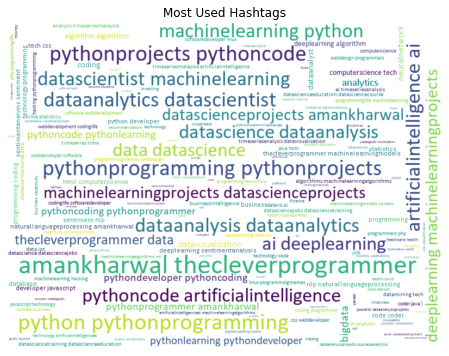

In [59]:

from wordcloud import WordCloud

hashtags = ' '.join(data['Hashtags'].dropna().tolist())
wordcloud = WordCloud( width=800, height=600, background_color='white', font_path='C:/Windows/Fonts/Calibri.ttf').generate(hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Hashtags')
plt.show()

### WordCloud For Captions


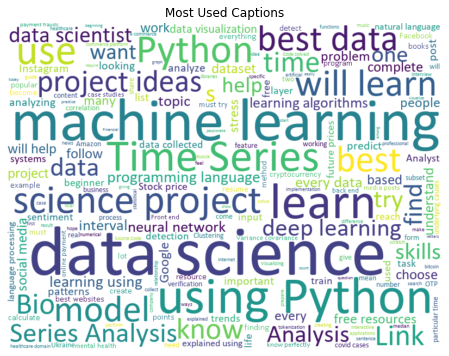

In [60]:
from wordcloud import WordCloud

hashtags = ' '.join(data['Caption'].dropna().tolist())
wordcloud = WordCloud( width=800, height=600, background_color='white', font_path='C:/Windows/Fonts/Calibri.ttf').generate(hashtags)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Captions')
plt.show()

## Relationship Analysis
Understanding the relationship between key metrics such as Impressions and Likes is crucial for content strategy. We delve into the correlation and distribution of Impressions vs. Likes.

but first we have to handle the outliers and normalize the data, so as to standardize the values by transorming them to a standard normal distibution with a mean of 0 and a standard deviation of 1

### Correlation between Impressions and Likes

Correlation coefficient after normalization and outlier removal: 0.86


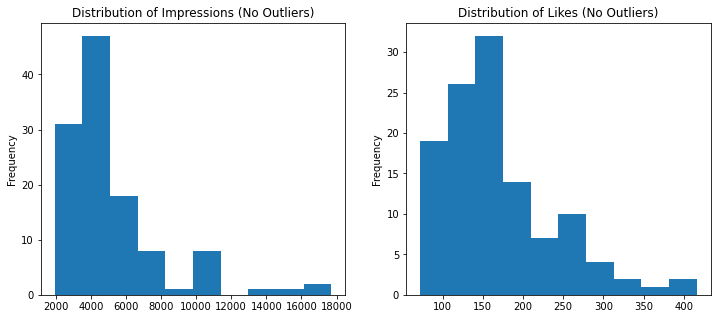

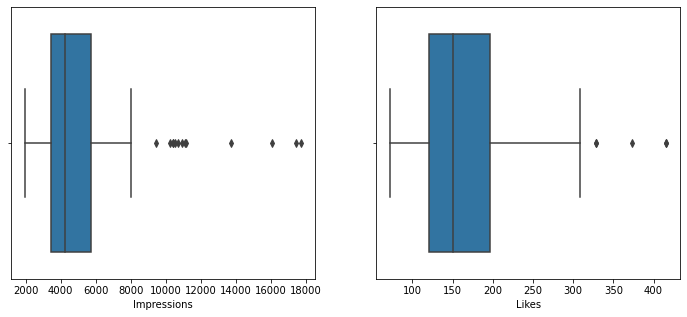

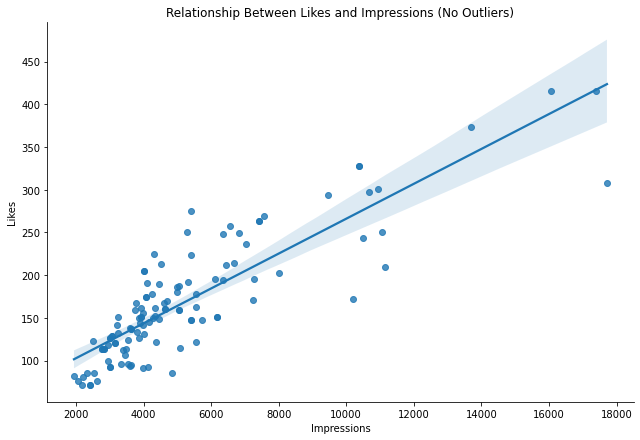

In [61]:
# Z-score normalization
data['Impressions_Z'] = zscore(data['Impressions'])
data['Likes_Z'] = zscore(data['Likes'])

# Remove outliers based on Z-score
threshold = 3  # Adjust as needed
data_no_outliers = data[(abs(data['Impressions_Z']) <= threshold) & (abs(data['Likes_Z']) <= threshold)]

# Correlation Analysis
correlation_after = data_no_outliers[['Impressions', 'Likes']].corr().iloc[0, 1]
print(f'Correlation coefficient after normalization and outlier removal: {correlation_after:.2f}')

# Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data_no_outliers['Impressions'].plot(kind='hist', ax=axes[0], title='Distribution of Impressions (No Outliers)')
data_no_outliers['Likes'].plot(kind='hist', ax=axes[1], title='Distribution of Likes (No Outliers)')
plt.show()

# Outlier Detection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=data_no_outliers['Impressions'], ax=axes[0])
sns.boxplot(x=data_no_outliers['Likes'], ax=axes[1])
plt.show()

# relationonship
sns.lmplot(x='Impressions', y='Likes', data=data_no_outliers, height=6, aspect=1.5)
plt.title('Relationship Between Likes and Impressions (No Outliers)')
plt.show()

0.86 is a Strong Positive Correlation: The positive sign indicates that as the number of impressions increases, the number of likes also tends to increase. The strength of 0.86 indicates a high degree of positive association.

Interpretation: In the context of social media or content sharing platforms, this correlation suggests that posts with higher impressions are highly likely to receive a larger number of likes. A

### Correlation between Impressions and Comments 

Correlation coefficient after normalization and outlier removal: 0.11


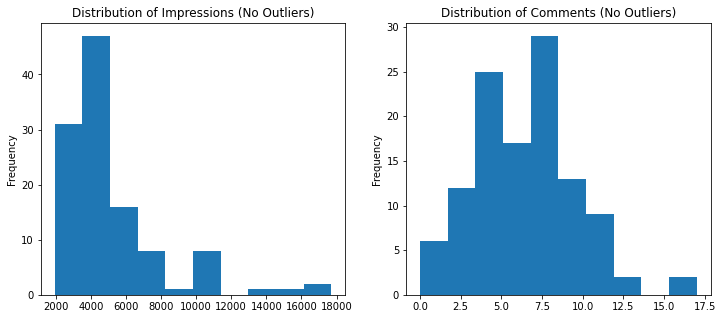

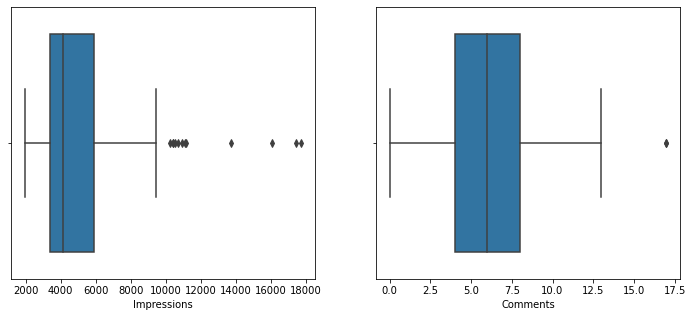

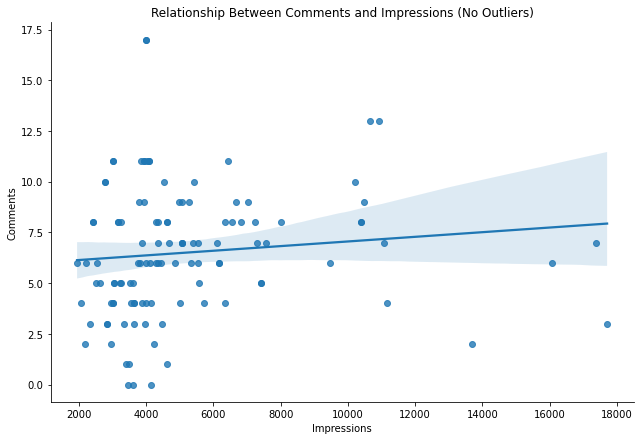

In [62]:
# Z-score normalization
data['Impressions_Z'] = zscore(data['Impressions'])
data['Comments_Z'] = zscore(data['Comments'])  # Adjusted for 'Comments'

# Remove outliers based on Z-score
threshold = 3  # Adjust as needed
data_no_outliers = data[(abs(data['Impressions_Z']) <= threshold) & (abs(data['Comments_Z']) <= threshold)]  # Adjusted for 'Comments'

# Correlation Analysis
correlation_after = data_no_outliers[['Impressions', 'Comments']].corr().iloc[0, 1]  # Adjusted for 'Comments'
print(f'Correlation coefficient after normalization and outlier removal: {correlation_after:.2f}')

# Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data_no_outliers['Impressions'].plot(kind='hist', ax=axes[0], title='Distribution of Impressions (No Outliers)')
data_no_outliers['Comments'].plot(kind='hist', ax=axes[1], title='Distribution of Comments (No Outliers)')  # Adjusted for 'Comments'
plt.show()

# Outlier Detection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=data_no_outliers['Impressions'], ax=axes[0])
sns.boxplot(x=data_no_outliers['Comments'], ax=axes[1])  # Adjusted for 'Comments'
plt.show()

# Relationship
sns.lmplot(x='Impressions', y='Comments', data=data_no_outliers, height=6, aspect=1.5)  # Adjusted for 'Comments'
plt.title('Relationship Between Comments and Impressions (No Outliers)')  # Adjusted for 'Comments'
plt.show()

0.11 is a Very Weak Positive Correlation. The positive sign suggests that as the number of impressions increases, there is a slight tendency for the number of comments to increase. However, the correlation is very weak that it is not sufficient to make meaningful predictions about comments based on impressions alone

Interpretation: In the context of social media or content sharing platforms, the weak correlation suggests that the reach of a post (impressions) does not strongly influence the number of comments. Other factors likely play a more significant role in determining the comment count.

### Correlation between Impressions and shares

Correlation coefficient after normalization and outlier removal: 0.44


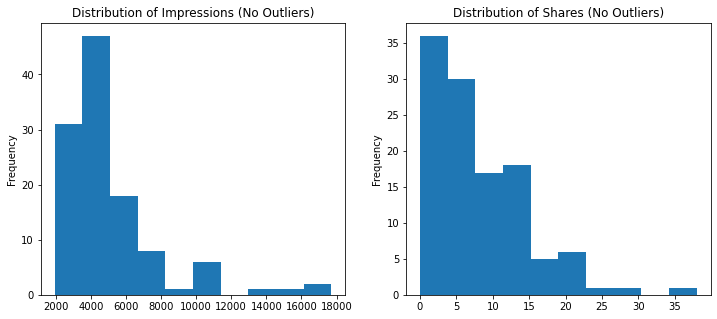

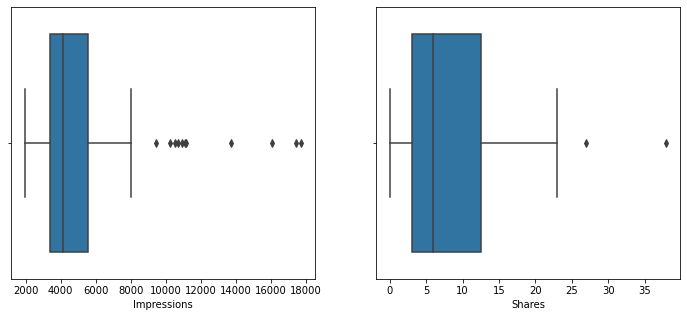

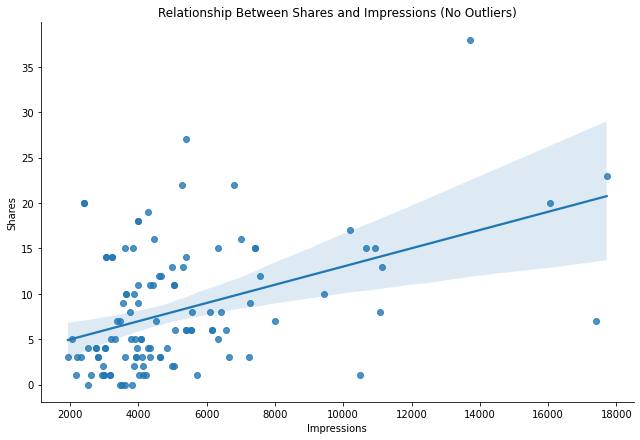

In [63]:
# Z-score normalization
data['Impressions_Z'] = zscore(data['Impressions'])
data['Shares_Z'] = zscore(data['Shares'])  # Adjusted for 'Shares'

# Remove outliers based on Z-score
threshold = 3  # Adjust as needed
data_no_outliers = data[(abs(data['Impressions_Z']) <= threshold) & (abs(data['Shares_Z']) <= threshold)]  # Adjusted for 'Shares'

# Correlation Analysis
correlation_after = data_no_outliers[['Impressions', 'Shares']].corr().iloc[0, 1]  # Adjusted for 'Shares'
print(f'Correlation coefficient after normalization and outlier removal: {correlation_after:.2f}')

# Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data_no_outliers['Impressions'].plot(kind='hist', ax=axes[0], title='Distribution of Impressions (No Outliers)')
data_no_outliers['Shares'].plot(kind='hist', ax=axes[1], title='Distribution of Shares (No Outliers)')  # Adjusted for 'Shares'
plt.show()

# Outlier Detection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=data_no_outliers['Impressions'], ax=axes[0])
sns.boxplot(x=data_no_outliers['Shares'], ax=axes[1])  # Adjusted for 'Shares'
plt.show()

# Relationship
sns.lmplot(x='Impressions', y='Shares', data=data_no_outliers, height=6, aspect=1.5)  # Adjusted for 'Shares'
plt.title('Relationship Between Shares and Impressions (No Outliers)')  # Adjusted for 'Shares'
plt.show()

Strength of Correlation: The value of 0.44 suggests a moderate positive correlation. While not extremely strong, it indicates a noticeable relationship between impressions and shares.

Interpretation: In the context of social media or content sharing platforms, this correlation suggests that posts with higher impressions are more likely to be shared by users. Users who see the post (impressions) find it interesting or engaging enough to share it with their own network.

User Engagement: 

Actionable Insights:Shares often indicate a higher level of user engagement and endorsement. When users share a post, they are contributing to its wider distribution, potentially reaching audiences beyond the original post's impressions. Focus on creating high-quality content that resonates with your audience. Engaging and shareable content is more likely to be spread across social networks.

### Correlation between Impressions and Saves

Correlation coefficient after normalization and outlier removal: 0.66


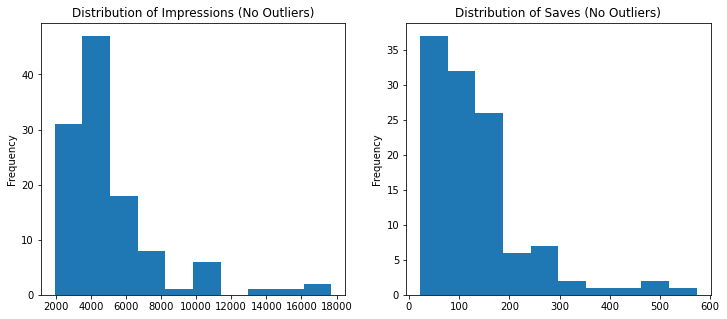

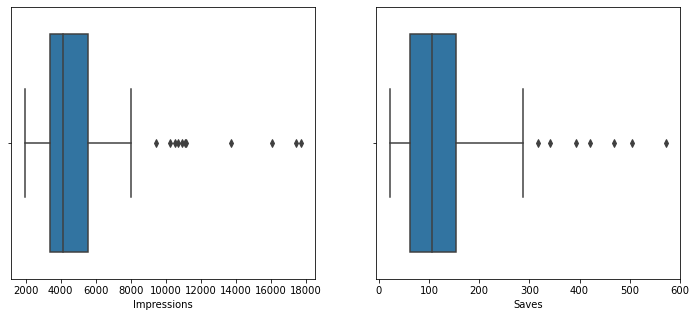

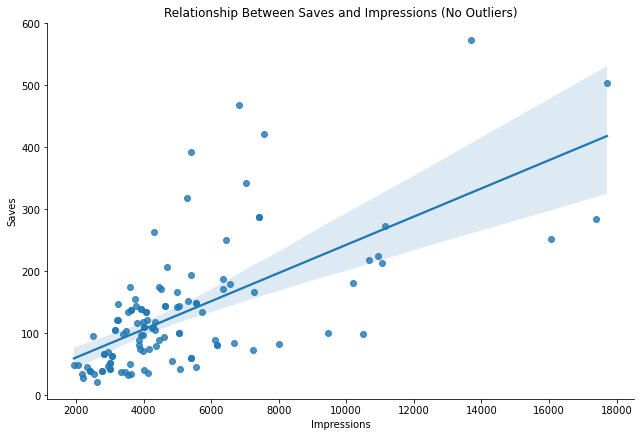

In [64]:
# Z-score normalization
data['Impressions_Z'] = zscore(data['Impressions'])
data['Saves_Z'] = zscore(data['Saves'])  # Adjusted for 'Saves'

# Remove outliers based on Z-score
threshold = 3  # Adjust as needed
data_no_outliers = data[(abs(data['Impressions_Z']) <= threshold) & (abs(data['Saves_Z']) <= threshold)]  # Adjusted for 'Saves'

# Correlation Analysis
correlation_after = data_no_outliers[['Impressions', 'Saves']].corr().iloc[0, 1]  # Adjusted for 'Saves'
print(f'Correlation coefficient after normalization and outlier removal: {correlation_after:.2f}')

# Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
data_no_outliers['Impressions'].plot(kind='hist', ax=axes[0], title='Distribution of Impressions (No Outliers)')
data_no_outliers['Saves'].plot(kind='hist', ax=axes[1], title='Distribution of Saves (No Outliers)')  # Adjusted for 'Saves'
plt.show()

# Outlier Detection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x=data_no_outliers['Impressions'], ax=axes[0])
sns.boxplot(x=data_no_outliers['Saves'], ax=axes[1])  # Adjusted for 'Saves'
plt.show()

# Relationship
sns.lmplot(x='Impressions', y='Saves', data=data_no_outliers, height=6, aspect=1.5)  # Adjusted for 'Saves'
plt.title('Relationship Between Saves and Impressions (No Outliers)')  # Adjusted for 'Saves'
plt.show()

The value of 0.66 suggests a moderate strength of correlation. While not extremely strong, it indicates a noticeable relationship between impressions and saves.

Interpretation: In the context of social media or content sharing platforms, this correlation suggests that posts with higher impressions are more likely to be saved by users. Users who see the post (impressions) find it interesting or valuable enough to save for future reference or to revisit.

Actionable Insight: Content creators or marketers might consider focusing on creating content that not only reaches a large audience (impressions) but also encourages users to save the content. This could involve creating content that is informative, entertaining, or otherwise valuable to the audience.

## Follower Conversion Rate

Def: in the context of instagram. **Follower convertion rate** is the percentage of users who decide to follow an instagram account after visiting the profile or intracting with a post.


In [65]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(f'{conversion_rate}%')

41.00265604249668%


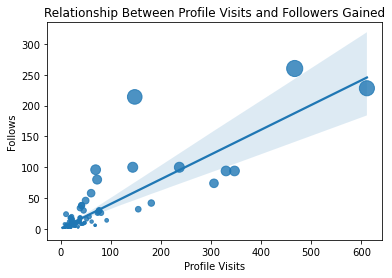

In [66]:
sns.regplot(x='Profile Visits', y='Follows', data=data, scatter_kws={'s': data['Follows']})
plt.title('Relationship Between Profile Visits and Followers Gained')
plt.show()

# Reach Forecasting using Regression Models
Forecasting the potential reach of a post is valuable for content planning. We explore various regression models to predict Reach based on key metrics.

In [67]:
# Define features and target variable
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [68]:
def model(ytest,ytrain,xtest,xtrain,model):
    
    model1 = model()
    model1.fit(xtrain,ytrain)
    y_pred = model1.predict(xtest)
    r2=r2_score(ytest, y_pred)
    
    result = {
        'model_name': str(model1),
        'MSE': mean_squared_error(ytest, y_pred),
        'MAE': mean_absolute_error(ytest, y_pred),
        'R2': f'{round(r2 * 100, 2)}%'
    }
    return result

## Training Different Regression Models

In [69]:
z = [model(ytest,ytrain,xtest,xtrain,i) for i in [LinearRegression,Lasso,Ridge,
                                                      ElasticNet,RandomForestRegressor,DecisionTreeRegressor,
                                                      KNeighborsRegressor,GradientBoostingRegressor]]
z

[{'model_name': 'LinearRegression()',
  'MSE': 4746059.11734046,
  'MAE': 1370.8520976195034,
  'R2': '87.78%'},
 {'model_name': 'Lasso()',
  'MSE': 4745025.665615668,
  'MAE': 1370.6164174948083,
  'R2': '87.78%'},
 {'model_name': 'Ridge()',
  'MSE': 4745076.006771688,
  'MAE': 1370.5538361218858,
  'R2': '87.78%'},
 {'model_name': 'ElasticNet()',
  'MSE': 4701638.7249489315,
  'MAE': 1357.3409048799003,
  'R2': '87.89%'},
 {'model_name': 'RandomForestRegressor()',
  'MSE': 6546461.684241665,
  'MAE': 1290.5941666666665,
  'R2': '83.14%'},
 {'model_name': 'DecisionTreeRegressor()',
  'MSE': 2007968.0416666667,
  'MAE': 855.7083333333334,
  'R2': '94.83%'},
 {'model_name': 'KNeighborsRegressor()',
  'MSE': 12188701.754999997,
  'MAE': 1549.0416666666667,
  'R2': '68.62%'},
 {'model_name': 'GradientBoostingRegressor()',
  'MSE': 2592589.4382465254,
  'MAE': 854.5486489244099,
  'R2': '93.32%'}]

## Selecting a Model

In [70]:
for model in z:
    model['R2'] = float(model['R2'].strip('%'))

# Find the index of the best model based on the highest R2 value
best_model_index = max(range(len(z)), key=lambda i: z[i]['R2'])

# Access the best model using the index
best_model = z[best_model_index]

# Print information about the best model
print('Best Model:')
print('-----------------')
print(f'Model Name: {best_model["model_name"]}')
print(f'MSE: {best_model["MSE"]}')
print(f'MAE: {best_model["MAE"]}')
print(f'R2: {best_model["R2"]}%')

Best Model:
-----------------
Model Name: DecisionTreeRegressor()
MSE: 2007968.0416666667
MAE: 855.7083333333334
R2: 94.83%


**The Decision Tree Regressor appears to be the best model for this dataset, as it outperforms others with the lowest MSE, MAE, and the highest R2 score. The high R2 score (94.69%) indicates that it explains a significant portion of the variance in the data.**

## Testing the Model

In [71]:
from sklearn.tree import DecisionTreeRegressor
model_best = DecisionTreeRegressor()
model_best.fit(xtrain, ytrain)
model_best.score(xtest, ytest)
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model_best.predict(features)


array([11068.])

## Conclusion

### Predicted Impressions:
The model predicts that, given the specified feature values, the content is expected to receive around 11068 impressions.

### Model Interpretation:
The Decision Tree Regressor, based on the provided features, has made this prediction. The model has learned from the training data and is now able to generalize to new data points.

### Prediction Confidence:
It's important to note that the model's prediction is based on the patterns it learned during training. The actual number of impressions may vary, and the model provides an estimate with a certain level of confidence.

### Application:
This prediction can be valuable for content creators and marketers to anticipate the potential reach or impact of their content based on user engagement features.